<a href="https://colab.research.google.com/github/akankshabw/Chirp/blob/master/Final_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,description,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,Not specified,XC134874 Alder Flycatcher (Empidonax alnorum),"['Empidonax minimus_Least Flycatcher', 'Leioth...",yes,Empidonax alnorum,"Grey Cloud Dunes SNA, Washington, Minnesota",44.793,48000 (Hz),call,220 m,Two short segments of fairly quiet *pip* calls...,192000 (bps),mp3,Not specified,American Yellow Warbler (Setophaga aestiva); L...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,1-3,XC135454 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen here moving around s...,128000 (bps),mp3,level,NaN,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,1-3,XC135455 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen chasing each other a...,128000 (bps),mp3,level,NaN,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,1-3,XC135456 Alder Flycatcher (Empidonax alnorum),"['Dumetella carolinensis_Gray Catbird', 'Bomby...",yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,Grey Catbird (Dumetella carolinensis); Cedar W...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,1-3,XC135457 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,NaN,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)

In [ ]:
df.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,description,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,Not specified,XC134874 Alder Flycatcher (Empidonax alnorum),"['Empidonax minimus_Least Flycatcher', 'Leioth...",yes,Empidonax alnorum,"Grey Cloud Dunes SNA, Washington, Minnesota",44.793,48000 (Hz),call,220 m,Two short segments of fairly quiet *pip* calls...,192000 (bps),mp3,Not specified,American Yellow Warbler (Setophaga aestiva); L...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,1-3,XC135454 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen here moving around s...,128000 (bps),mp3,level,NaN,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,1-3,XC135455 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen chasing each other a...,128000 (bps),mp3,level,NaN,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,1-3,XC135456 Alder Flycatcher (Empidonax alnorum),"['Dumetella carolinensis_Gray Catbird', 'Bomby...",yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,Grey Catbird (Dumetella carolinensis); Cedar W...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,1-3,XC135457 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,NaN,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [ ]:
df.shape

In [ ]:
df.info()

We can see that most of the columns are of dtype object. So, lets try to make them of int or float if possible.

In [ ]:
df.describe()

In [ ]:
df['rating'].unique()

array([3.5, 4. , 4.5, 5. , 3. , 2.5, 1.5, 1. , 2. , 0.5, 0. ])

The ratings column looks fine.

In [ ]:
df.playback_used.unique()

array(['no', nan, 'yes'], dtype=object)

In [ ]:
df['playback_used'].value_counts()

no     18964
yes      611
Name: playback_used, dtype: int64

In this column, we need to fill the nan values with no as it is the mode and then encode yes and no into binary which will be great for analysis. We can then drop this column.

In [ ]:
df['playback_used'].fillna('no',inplace=True)

In [ ]:
le = LabelEncoder()
df['playback_used_encoded'] = le.fit_transform(df['playback_used'])
print("Label Mapping:", df[['playback_used','playback_used_encoded']])


Label Mapping:       playback_used  playback_used_encoded
0                no                      0
1                no                      0
2                no                      0
3                no                      0
4                no                      0
...             ...                    ...
21370            no                      0
21371            no                      0
21372            no                      0
21373            no                      0
21374            no                      0

[21375 rows x 2 columns]


In [ ]:
df.drop('playback_used',axis=1,inplace = True)

In [ ]:
df['ebird_code'].unique()

array(['aldfly', 'ameavo', 'amebit', 'amecro', 'amegfi', 'amekes',
       'amepip', 'amered', 'amerob', 'amewig', 'amewoo', 'amtspa',
       'annhum', 'astfly', 'baisan', 'baleag', 'balori', 'banswa',
       'barswa', 'bawwar', 'belkin1', 'belspa2', 'bewwre', 'bkbcuc',
       'bkbmag1', 'bkbwar', 'bkcchi', 'bkchum', 'bkhgro', 'bkpwar',
       'bktspa', 'blkpho', 'blugrb1', 'blujay', 'bnhcow', 'boboli',
       'bongul', 'brdowl', 'brebla', 'brespa', 'brncre', 'brnthr',
       'brthum', 'brwhaw', 'btbwar', 'btnwar', 'btywar', 'buffle',
       'buggna', 'buhvir', 'bulori', 'bushti', 'buwtea', 'buwwar',
       'cacwre', 'calgul', 'calqua', 'camwar', 'cangoo', 'canwar',
       'canwre', 'carwre', 'casfin', 'caster1', 'casvir', 'cedwax',
       'chispa', 'chiswi', 'chswar', 'chukar', 'clanut', 'cliswa',
       'comgol', 'comgra', 'comloo', 'commer', 'comnig', 'comrav',
       'comred', 'comter', 'comyel', 'coohaw', 'coshum', 'cowscj1',
       'daejun', 'doccor', 'dowwoo', 'dusfly', 'eargre',

In [ ]:
df.ebird_code.isnull().sum()

No changes can be made in this column as these look like codes for birds and might be needed in data analysis further. Also there are no null values to be replaced.

In [ ]:
df['channels'].unique()

The 'mono' and 'stereo' part of the data can be removed.

In [ ]:
df['channels'] = df['channels'].astype(str).str[0].astype(int)

In [ ]:
df.date.unique()

We can create 3 different columns each of day, month and year it would be of int dtype and then drop this column.

In [ ]:
df['day'] = df['date'].apply(lambda x: x.split('-')[2]).astype(int)
df['month'] = df['date'].apply(lambda x: x.split('-')[1]).astype(int)
df['year'] = df['date'].apply(lambda x: x.split('-')[0]).astype(int)
df.drop('date', axis=1,inplace=True)

In [ ]:
df.head()

,rating,playback_used,ebird_code,channels,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,description,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license,day,month,year
0,3.5,no,aldfly,1 (mono),Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,Not specified,XC134874 Alder Flycatcher (Empidonax alnorum),"['Empidonax minimus_Least Flycatcher', 'Leioth...",yes,Empidonax alnorum,"Grey Cloud Dunes SNA, Washington, Minnesota",44.793,48000 (Hz),call,220 m,Two short segments of fairly quiet *pip* calls...,192000 (bps),mp3,Not specified,American Yellow Warbler (Setophaga aestiva); L...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0,25,5,2013
1,4.0,no,aldfly,2 (stereo),both,36,XC135454.mp3,both,Alder Flycatcher,1-3,XC135454 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen here moving around s...,128000 (bps),mp3,level,NaN,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,27,5,2013
2,4.0,no,aldfly,2 (stereo),both,39,XC135455.mp3,both,Alder Flycatcher,1-3,XC135455 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen chasing each other a...,128000 (bps),mp3,level,NaN,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,27,5,2013
3,3.5,no,aldfly,2 (stereo),both,33,XC135456.mp3,both,Alder Flycatcher,1-3,XC135456 Alder Flycatcher (Empidonax alnorum),"['Dumetella carolinensis_Gray Catbird', 'Bomby...",yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,Grey Catbird (Dumetella carolinensis); Cedar W...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,27,5,2013
4,4.0,no,aldfly,2 (stereo),both,36,XC135457.mp3,level,Alder Flycatcher,1-3,XC135457 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,NaN,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,27,5,2013


In [ ]:
df.pitch.unique()

In [ ]:
df.pitch.value_counts()

Not specified    15155
level             3149
both              2077
decreasing         528
increasing         466
Name: pitch, dtype: int64

As most of the values are not specified, we cannot do anything with this.

In [ ]:
df.duration.unique()

array([ 25,  36,  39,  33,   7,  45,  71,  26,  54, 269,  31,  19,   9,
        29,  13,  16, 315,  46,  84, 136,  22,  58,  56,  23,  17,  38,
        72,  86, 103, 127,  41, 120,  21,  42, 130,  69,  60,  78, 141,
       188,  59,  20, 386,  82, 149,  75,  70, 116,  66,  83, 105,  50,
        62,  15,  11,  73,  35,  51,  64, 245,  30,  14,   6,  96, 178,
       177,   5,   1,  10,  48,  27,  43,  98,  18, 145,  28,  53, 165,
       122, 137,  24,  55,   2,  12, 150, 146, 164, 217,  65, 288, 419,
         0, 374,  34, 214,  49,   4, 111,  61, 126, 135,  57, 152,  47,
       200, 229,  93, 262, 142, 187, 113, 264,  80,  89,   8,  74, 228,
       300, 220, 157, 132,   3, 100,  99,  40,  52, 112, 158, 427, 162,
       119, 153,  32, 441, 179,  88, 212, 131,  77, 144, 101, 143, 307,
        97,  95, 129, 313,  37,  76,  85,  81, 108,  63, 104,  67, 286,
       402, 238, 138, 251, 160, 109, 233, 194, 140, 234, 172,  44, 102,
       114, 128, 207, 199, 209,  68, 202, 133, 193, 216, 232, 11

In [ ]:
df.duration.isnull().sum()

This column looks fine and thus needs no change.

In [ ]:
df.filename.unique()

In [ ]:
df.filename.isnull().sum() ##This also looks fine.

In [ ]:
df.speed.unique()

In [ ]:
df.speed.value_counts()

This column is similar as the 'pitch' as very less data is specified.

In [ ]:
df.species.unique()

array(['Alder Flycatcher', 'American Avocet', 'American Bittern',
       'American Crow', 'American Goldfinch', 'American Kestrel',
       'Buff-bellied Pipit', 'American Redstart', 'American Robin',
       'American Wigeon', 'American Woodcock', 'American Tree Sparrow',
       "Anna's Hummingbird", 'Ash-throated Flycatcher',
       "Baird's Sandpiper", 'Bald Eagle', 'Baltimore Oriole',
       'Sand Martin', 'Barn Swallow', 'Black-and-white Warbler',
       'Belted Kingfisher', "Bell's Sparrow", "Bewick's Wren",
       'Black-billed Cuckoo', 'Black-billed Magpie',
       'Blackburnian Warbler', 'Black-capped Chickadee',
       'Black-chinned Hummingbird', 'Black-headed Grosbeak',
       'Blackpoll Warbler', 'Black-throated Sparrow', 'Black Phoebe',
       'Blue Grosbeak', 'Blue Jay', 'Brown-headed Cowbird', 'Bobolink',
       "Bonaparte's Gull", 'Barred Owl', "Brewer's Blackbird",
       "Brewer's Sparrow", 'Brown Creeper', 'Brown Thrasher',
       'Broad-tailed Hummingbird', 'Broad-wi

In [ ]:
df.species.isnull().sum()

Looks fine.

In [ ]:
df['number_of_notes'].unique()

array(['Not specified', '1-3', '4-6', '7-20', '>20'], dtype=object)

In [ ]:
df['number_of_notes'].value_counts()

Not specified    15042
1-3               2568
7-20              2013
4-6               1016
>20                736
Name: number_of_notes, dtype: int64

This column also does not have much data specified..but no. of notes may be useful, so I am dropping that.

In [ ]:
df.title.unique()

array(['XC134874 Alder Flycatcher (Empidonax alnorum)',
       'XC135454 Alder Flycatcher (Empidonax alnorum)',
       'XC135455 Alder Flycatcher (Empidonax alnorum)', ...,
       'XC501230 Yellow-throated Vireo (Vireo flavifrons)',
       'XC54828 Yellow-throated Vireo (Vireo flavifrons)',
       'XC55761 Yellow-throated Vireo (Vireo flavifrons)'], dtype=object)

The first word looks similar to the filename. Lets check if it is true and then just remove it.

In [ ]:
if(df['filename'].apply(lambda x: x.split('.')[0]).all()==df['title'].apply(lambda x: x.split(' ')[0]).all()):
  print('Same')

Same


Yes, they are the same. So lets remove it from title.

In [ ]:
df['title'] = df['title'].str.split(n=1).str[1]

In [ ]:
df.title.unique()

In [ ]:
df.secondary_labels.unique()

In [ ]:
df.secondary_labels.nunique()

5385

As we already have titles column for the labels of birds, we can drop this column.

In [ ]:
df.drop('secondary_labels',axis=1,inplace=True)

In [ ]:
df.bird_seen.unique()

array(['yes', 'no', nan], dtype=object)

In [ ]:
df.bird_seen.value_counts()

yes    16211
no      3364
Name: bird_seen, dtype: int64

Lets replace the nan values with 'yes' values as it is the mode. Then we encode it and drop this column, keeping the new one.

In [ ]:
df.bird_seen.fillna('yes',inplace=True)

In [ ]:
le = LabelEncoder()
df['bird_seen_encoded'] = le.fit_transform(df['bird_seen'])

In [ ]:
df.sci_name.unique()

We can observe that the title column has this scientific name in it in brackets..So, we can just split it.

In [ ]:
df['title'] = df['title'].apply(lambda x: x.split('(')[0])

In [ ]:
df['title']

0       Alder Flycatcher 
1       Alder Flycatcher 
2       Alder Flycatcher 
3       Alder Flycatcher 
4       Alder Flycatcher 
              ...        
4618         Cactus Wren 
4619         Cactus Wren 
4620         Cactus Wren 
4621         Cactus Wren 
4622         Cactus Wren 
Name: title, Length: 4623, dtype: object

In [ ]:
df.location.unique()

array([' Grey Cloud Dunes SNA, Washington, Minnesota',
       " Carver's Gap Parking area, Roan Mountain State Park, North Carolina",
       ' Scales, near Wilson Creek, Grayson, Virginia', ...,
       ' Sprewell Bluff WMA, Pigeon Creek Tract',
       ' Mimbres, Grant County, New Mexico',
       ' Park Headquarters Rd W, Sugarlands, Great Smoky Mountains National Park, Tennessee'],
      dtype=object)

In [ ]:
df.location.isnull().sum()

0

In [ ]:
df.latitude.unique()

array(['44.793', '36.1065', '36.65', ..., '26.5406', '25.6268', '31.7992'],
      dtype=object)

In [ ]:
df.longitude.unique()

array(['-92.962', '-82.1106', '-81.4814', ..., '-109.0428', '-110.7821',
       nan], dtype=object)

The dtype of this column can be changed to float.


In [ ]:
df = df[df['latitude']!='Not specified']
df = df[df['longitude']!='Not specified']

In [ ]:
df.latitude.astype(float)
df.longitude.astype(float)

0       -92.9620
1       -82.1106
2       -82.1106
3       -82.1106
4       -82.1106
          ...   
21370   -84.0131
21371   -77.3422
21372   -77.3422
21373   -83.9462
21374   -83.5409
Name: longitude, Length: 21149, dtype: float64

In [ ]:
df['sampling_rate'].unique()

array(['48000 (Hz)', '44100 (Hz)', '16000 (Hz)', '22050 (Hz)',
       '24000 (Hz)', '32000 (Hz)', '8000 (Hz)'], dtype=object)

The '(Hz)' is common in all the values. So, it can be removed.

In [ ]:
df['sampling_rate'] = df['sampling_rate'].apply(lambda x: x.split(' ')[0]).astype(int)

In [ ]:
df.sampling_rate.unique()

array([48000, 44100, 16000, 22050, 24000, 32000,  8000])

In [ ]:
df.type.unique()

array(['call', 'call, song', 'song', ...,
       'call, song, vocal and mechanical sounds', 'calls, female',
       'chimp call, male, song'], dtype=object)

In [ ]:
df.type.nunique()

1255

Not much can be in this column as these are string objects and are unique.

In [ ]:
df['elevation'].unique()

array(['220 m', '1700 m', '1400 m', '190 m', '588 m', '10 m', '0 m',
       '550 m', '260 m', '20 m', '380 m', '210 m', '1600 m', '90 m',
       '300 m', '30 m', '180 m', '1100 m', '750 m', '500 m', '600 m',
       '440 m', '1000 m', '60 m', '50 m', '320 m', '70 m', '400 m',
       '189 m', '40 m', '250 m', '280 m', '800 m', '100 m', '240 m',
       '170 m', '1300 m', '850 m', '1900 m', '460 m', '1800 m', '2200 m',
       '120 m', '-70 m', '2 m', '420 m', '599 m', '1500 m', '340 m',
       '2500 m', '2700 m', '700 m', '8 m', '480 m', '80 m', '130 m',
       '2000 m', '2100 m', '200 m', '5 m', '110 m', '360 m', '140 m',
       '2900 m', '1450 m', '1780 m', '2400 m', '900 m', '1200 m', '-50 m',
       '2600 m', '160 m', '99999', '75 m', '2885 m', '3400 m', '3500 m',
       '-30 m', '3200 m', '3100 m', '3300 m', '1650 m', '-240 m', '-10 m',
       '450 m', '285 m', '650 m', '950 m', '350 m', '2800 m', '802 m',
       '150 m', '1 m', '607 m', '1072 m', '270 m', '175 m', '185 m',
       '88

Lets convert all the invalid values into valid ones and then into int dtype.

In [ ]:
df['elevation'] = df['elevation'].replace(['? m','Unknown m', ' m','- m', '?? m','NaN'],'99999')

In [ ]:
df['elevation'] = df['elevation'].str.replace(',','')

In [ ]:
df['elevation'] = df['elevation'].str.replace('.','')

<ipython-input-171-3400b03e12be>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['elevation'] = df['elevation'].str.replace('.','')


In [ ]:
df['elevation'] = df['elevation'].str.replace('~','')

In [ ]:
for index, row in df.iterrows():
    elevation = row['elevation']
    if '-' in elevation and not elevation.startswith('-'):
        # Replace range values with their minimum
        range_values = elevation.split('-')
        df.at[index, 'elevation'] = min(int(range_values[0].strip(' m')), int(range_values[1].strip(' m')))



In [ ]:
df.elevation = df['elevation'].str.replace('m','')

In [ ]:
df.elevation.fillna('99999',inplace=True)

In [ ]:
df.elevation.unique()

array(['220 ', '1700 ', '1400 ', '190 ', '588 ', '10 ', '0 ', '550 ',
       '260 ', '20 ', '380 ', '210 ', '1600 ', '90 ', '300 ', '30 ',
       '180 ', '1100 ', '750 ', '500 ', '600 ', '440 ', '1000 ', '60 ',
       '50 ', '320 ', '70 ', '400 ', '189 ', '40 ', '250 ', '280 ',
       '800 ', '100 ', '240 ', '170 ', '1300 ', '850 ', '1900 ', '460 ',
       '1800 ', '2200 ', '120 ', '-70 ', '2 ', '420 ', '599 ', '1500 ',
       '340 ', '2500 ', '2700 ', '700 ', '8 ', '480 ', '80 ', '130 ',
       '2000 ', '2100 ', '200 ', '5 ', '110 ', '360 ', '140 ', '2900 ',
       '1450 ', '1780 ', '2400 ', '900 ', '1200 ', '-50 ', '2600 ',
       '160 ', '99999', '75 ', '2885 ', '3400 ', '3500 ', '-30 ', '3200 ',
       '3100 ', '3300 ', '1650 ', '-240 ', '-10 ', '450 ', '285 ', '650 ',
       '950 ', '350 ', '2800 ', '802 ', '150 ', '1 ', '607 ', '1072 ',
       '270 ', '175 ', '185 ', '888 ', '710 ', '44 ', '3700 ', '4600 ',
       '3680 ', '3880 ', '3850 ', '4232 ', '4500 ', '2300 ', '218 ',
    

In [ ]:
df['elevation'] = pd.to_numeric(df['elevation'],errors='coerce')
sum_elevation =0
count_valid_values = 0

for index,row in df.iterrows():
  if row['elevation'] != 99999 :
    sum_elevation += row['elevation']
    count_valid_values += 1
mean_elevation = sum_elevation/count_valid_values
mean_elevation

666.7952970415332

In [ ]:
df['elevation'] = df['elevation'].replace(['99999'],mean_elevation)

In [ ]:
df.elevation.dtype

dtype('int64')

In [ ]:
df['description'].unique()

array(['Two short segments of fairly quiet *pip* calls (at 0:01.2, 0:07.5, etc) from a migrant bird foraging in scrub at edge of the prairie.  Also a more emphatic call at the end of the first segment (0:18.6) as it was taking flight.\r\n\r\nRecorded with homemade parabolic reflector.',
       'At least three birds seen here moving around some stunted alders and Fraser Firs. img:http://www.flickr.com/photos/madbirder/8884100252/in/photostream/',
       'At least three birds seen chasing each other around stunted alders and Fraser Firs. img:http://www.flickr.com/photos/madbirder/8884100252/in/photostream/',
       ..., 'At nightfall. But heard as well in the middle of the night.',
       'About 50ft away in deciduous forest.',
       'From edge of deciduous forest, about 30ft away. Initially seen at close range from car, perched on a metal post. Insect hum in background.'],
      dtype=object)

Very descriptive texts about each bird audio. Not of that use. So, this column can be dropped.

In [ ]:
df.drop('description',axis=1,inplace=True)

In [ ]:
df['bitrate_of_mp3'].unique()

In [ ]:
df['bitrate_of_mp3'].nunique()

375

We can fill the NaN values with mean and then convert the dtype into int.

In [ ]:
df[df['bitrate_of_mp3'].isna()]

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
711,5.0,no,amerob,2 (stereo),2017-04-24,Not specified,50,XC367008.mp3,Not specified,American Robin,Not specified,XC367008 American Robin (Turdus migratorius),[],yes,Turdus migratorius,"Fenton River near Lions Field, Mansfield, Tol...",41.7826,44100 (Hz),song,70,NaN,mp2,Not specified,NaN,367008,https://www.xeno-canto.org/367008,United States,Jorge de Leon Cardozo,Turdus migratorius_American Robin,-72.2027,Not specified,18:30,Jorge de Leon Cardozo,Creative Commons Attribution-NonCommercial-Sha...


In [ ]:
df['bitrate_of_mp3'].fillna('0',inplace=True)

In [ ]:
df['bitrate_of_mp3'].unique()

In [ ]:
df['bitrate_of_mp3'] = df['bitrate_of_mp3'].apply(lambda x:x.split(' ')[0]).astype(int)

In [ ]:
df['bitrate_of_mp3'] = df['bitrate_of_mp3'].replace(0,df['bitrate_of_mp3'].mean())

In [ ]:
df['file_type'].unique()

array(['mp3', 'mp2'], dtype=object)

In [ ]:
df['volume'].unique()

array(['Not specified', 'level', 'increasing', 'both', 'decreasing'],
      dtype=object)

In [ ]:
df['background'].unique()

In [ ]:
df['xc_id'].unique()

array([134874, 135454, 135455, ..., 419947, 425120, 428282])

This xc_id is alreaqdy mentioned in filename. So, we can drop it.

In [ ]:
df.drop('xc_id',axis=1,inplace=True)

In [ ]:
df['url'].unique()

array(['https://www.xeno-canto.org/134874',
       'https://www.xeno-canto.org/135454',
       'https://www.xeno-canto.org/135455', ...,
       'https://www.xeno-canto.org/419947',
       'https://www.xeno-canto.org/425120',
       'https://www.xeno-canto.org/428282'], dtype=object)

In [ ]:
df['url'].isna().sum()

0

In [ ]:
df.country.unique()

array(['United States', 'Canada', 'Honduras', 'Bolivia', 'Ecuador',
       'Colombia', 'Mexico', 'Chile', 'Dominican Republic', 'Brazil',
       'Guatemala', 'Argentina', 'Peru', 'Uruguay', 'Russian Federation',
       'China', 'Portugal', 'Japan', 'Azerbaijan', 'Georgia',
       'South Korea', 'Israel', 'Mongolia', 'Jamaica', 'Cuba',
       'Costa Rica', 'Sweden', 'Finland', 'Panama', 'El Salvador',
       'Nicaragua', 'Denmark', 'France', 'Uzbekistan', 'Kazakhstan',
       'Poland', 'Germany', 'Netherlands', 'Belgium', 'Italy',
       'United Kingdom', 'Norway', 'Switzerland', 'Spain', 'South Africa',
       'Ireland', 'Croatia', 'India', 'Indonesia', 'Greece', 'Cyprus',
       'Kuwait', 'Ukraine', 'Venezuela'], dtype=object)

In [ ]:
df.author.nunique()

356

In [ ]:
df.recordist.nunique()

356

In [ ]:
df[df['author']!=df['recordist']]

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,bitrate_of_mp3,file_type,volume,background,url,country,author,primary_label,longitude,length,time,recordist,license


So, both the columns are same. Lets drop the authors column.

In [ ]:
df.drop('author',axis=1,inplace=True)

In [ ]:
df.primary_label.unique()

array(['Empidonax alnorum_Alder Flycatcher',
       'Recurvirostra americana_American Avocet',
       'Botaurus lentiginosus_American Bittern',
       'Corvus brachyrhynchos_American Crow',
       'Spinus tristis_American Goldfinch',
       'Falco sparverius_American Kestrel',
       'Anthus rubescens_American Pipit',
       'Setophaga ruticilla_American Redstart',
       'Turdus migratorius_American Robin',
       'Mareca americana_American Wigeon',
       'Scolopax minor_American Woodcock',
       'Spizelloides arborea_American Tree Sparrow',
       "Calypte anna_Anna's Hummingbird",
       'Myiarchus cinerascens_Ash-throated Flycatcher',
       "Calidris bairdii_Baird's Sandpiper",
       'Haliaeetus leucocephalus_Bald Eagle',
       'Icterus galbula_Baltimore Oriole', 'Riparia riparia_Bank Swallow',
       'Hirundo rustica_Barn Swallow',
       'Mniotilta varia_Black-and-white Warbler',
       'Megaceryle alcyon_Belted Kingfisher',
       "Artemisiospiza belli_Bell's Sparrow",
    

In [ ]:
df.length.unique()

array(['Not specified', '0-3(s)', '6-10(s)', '>10(s)', '3-6(s)'],
      dtype=object)

In [ ]:
df['min_value'] = df['length'].str.extract(r'(\d+)')
df['min_value'] = pd.to_numeric(df['min_value'],errors='coerce')

In [ ]:
df['max_value'] = df['length'].str.extract(r'-(\d+)')
df['max_value'] = pd.to_numeric(df['max_value'],errors='coerce')
df.head()

,rating,ebird_code,channels,pitch,duration,filename,speed,species,number_of_notes,title,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,bitrate_of_mp3,file_type,volume,background,url,country,primary_label,longitude,length,time,recordist,license,playback_used_encoded,day,month,year,bird_seen_encoded,min_value,max_value
0,3.5,aldfly,1,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,Not specified,Alder Flycatcher,yes,Empidonax alnorum,"Grey Cloud Dunes SNA, Washington, Minnesota",44.793,48000,call,220,192000.0,mp3,Not specified,American Yellow Warbler (Setophaga aestiva); L...,https://www.xeno-canto.org/134874,United States,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0,0,25,5,2013,1,NaN,NaN
1,4.0,aldfly,2,both,36,XC135454.mp3,both,Alder Flycatcher,1-3,Alder Flycatcher,yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100,"call, song",1700,128000.0,mp3,level,NaN,https://www.xeno-canto.org/135454,United States,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,0,27,5,2013,1,0.0,3.0
2,4.0,aldfly,2,both,39,XC135455.mp3,both,Alder Flycatcher,1-3,Alder Flycatcher,yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100,"call, song",1700,128000.0,mp3,level,NaN,https://www.xeno-canto.org/135455,United States,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,0,27,5,2013,1,0.0,3.0
3,3.5,aldfly,2,both,33,XC135456.mp3,both,Alder Flycatcher,1-3,Alder Flycatcher,yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100,"call, song",1700,128000.0,mp3,level,Grey Catbird (Dumetella carolinensis); Cedar W...,https://www.xeno-canto.org/135456,United States,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,0,27,5,2013,1,0.0,3.0
4,4.0,aldfly,2,both,36,XC135457.mp3,level,Alder Flycatcher,1-3,Alder Flycatcher,yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100,"call, song",1700,128000.0,mp3,level,NaN,https://www.xeno-canto.org/135457,United States,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,0,27,5,2013,1,0.0,3.0


In [ ]:
df.time.unique()

array(['8:00', '08:30', '10:00', ..., '6:19', '6:32', '6:40'],
      dtype=object)

I don't think knowing the time when audio is recorded is going to matter much. So, we can safely drop it.

In [ ]:
df.drop('time',axis=1,inplace=True)

In [ ]:
df.license.unique()

array(['Creative Commons Attribution-ShareAlike 3.0',
       'Creative Commons Attribution-NonCommercial-ShareAlike 3.0',
       'Creative Commons Attribution-NonCommercial-ShareAlike 4.0',
       'Creative Commons Attribution-ShareAlike 4.0', 'Creat'],
      dtype=object)

Only 4 unique values. So, we can encode them using label encoder.

In [ ]:
le = LabelEncoder()
df['license_encoded'] = le.fit_transform(df['license'])
encoded_unique_values = df['license_encoded'].unique()
label_mapping = dict(zip(df['license'],df['license_encoded']))

print('Label Encoded Unique Values:', encoded_unique_values)
print('Label Mapping:', label_mapping)

Label Encoded Unique Values: [2 0 1 3]
Label Mapping: {'Creative Commons Attribution-ShareAlike 3.0': 2, 'Creative Commons Attribution-NonCommercial-ShareAlike 3.0': 0, 'Creative Commons Attribution-NonCommercial-ShareAlike 4.0': 1, 'Creative Commons Attribution-ShareAlike 4.0': 3}


In [ ]:
df.drop('license',axis=1,inplace=True)

In [ ]:
df.describe()

,rating,channels,duration,sampling_rate,elevation,bitrate_of_mp3,playback_used_encoded,day,month,year,bird_seen_encoded,min_value,max_value,license_encoded
count,21149.000000,21149.000000,21149.000000,21149.000000,21149.000000,21149.000000,21149.000000,21149.000000,21149.000000,21149.000000,21149.000000,6718.000000,6175.000000,21149.000000
mean,4.072817,1.463048,56.064684,45357.639841,1728.267625,170087.618347,0.028843,15.590666,5.824814,2012.843444,0.843539,1.334326,3.611336,0.815783
std,0.985637,0.498644,76.507435,3235.324419,10243.906744,73410.337424,0.167369,8.737988,2.562884,54.338372,0.363301,2.920185,1.597962,0.486740
min,0.000000,1.000000,0.000000,8000.000000,-240.000000,16000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,3.500000,1.000000,15.000000,44100.000000,40.000000,128000.000000,0.000000,8.000000,4.000000,2013.000000,1.000000,0.000000,3.000000,1.000000
50%,4.000000,1.000000,33.000000,44100.000000,280.000000,128000.000000,0.000000,16.000000,6.000000,2015.000000,1.000000,0.000000,3.000000,1.000000
75%,5.000000,2.000000,68.000000,48000.000000,1300.000000,192000.000000,0.000000,23.000000,7.000000,2017.000000,1.000000,0.000000,3.000000,1.000000
max,5.000000,2.000000,2283.000000,48000.000000,99999.000000,331417.000000,1.000000,31.000000,12.000000,2019.000000,1.000000,10.000000,10.000000,3.000000


In [ ]:
df.head()

,rating,ebird_code,channels,pitch,duration,filename,speed,species,number_of_notes,title,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,bitrate_of_mp3,file_type,volume,background,url,country,primary_label,longitude,length,recordist,playback_used_encoded,day,month,year,bird_seen_encoded,min_value,max_value,license_encoded
0,3.5,aldfly,1,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,Not specified,Alder Flycatcher,yes,Empidonax alnorum,"Grey Cloud Dunes SNA, Washington, Minnesota",44.793,48000,call,220,192000.0,mp3,Not specified,American Yellow Warbler (Setophaga aestiva); L...,https://www.xeno-canto.org/134874,United States,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,Jonathon Jongsma,0,25,5,2013,1,NaN,NaN,2
1,4.0,aldfly,2,both,36,XC135454.mp3,both,Alder Flycatcher,1-3,Alder Flycatcher,yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100,"call, song",1700,128000.0,mp3,level,NaN,https://www.xeno-canto.org/135454,United States,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),Mike Nelson,0,27,5,2013,1,0.0,3.0,0
2,4.0,aldfly,2,both,39,XC135455.mp3,both,Alder Flycatcher,1-3,Alder Flycatcher,yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100,"call, song",1700,128000.0,mp3,level,NaN,https://www.xeno-canto.org/135455,United States,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),Mike Nelson,0,27,5,2013,1,0.0,3.0,0
3,3.5,aldfly,2,both,33,XC135456.mp3,both,Alder Flycatcher,1-3,Alder Flycatcher,yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100,"call, song",1700,128000.0,mp3,level,Grey Catbird (Dumetella carolinensis); Cedar W...,https://www.xeno-canto.org/135456,United States,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),Mike Nelson,0,27,5,2013,1,0.0,3.0,0
4,4.0,aldfly,2,both,36,XC135457.mp3,level,Alder Flycatcher,1-3,Alder Flycatcher,yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100,"call, song",1700,128000.0,mp3,level,NaN,https://www.xeno-canto.org/135457,United States,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),Mike Nelson,0,27,5,2013,1,0.0,3.0,0


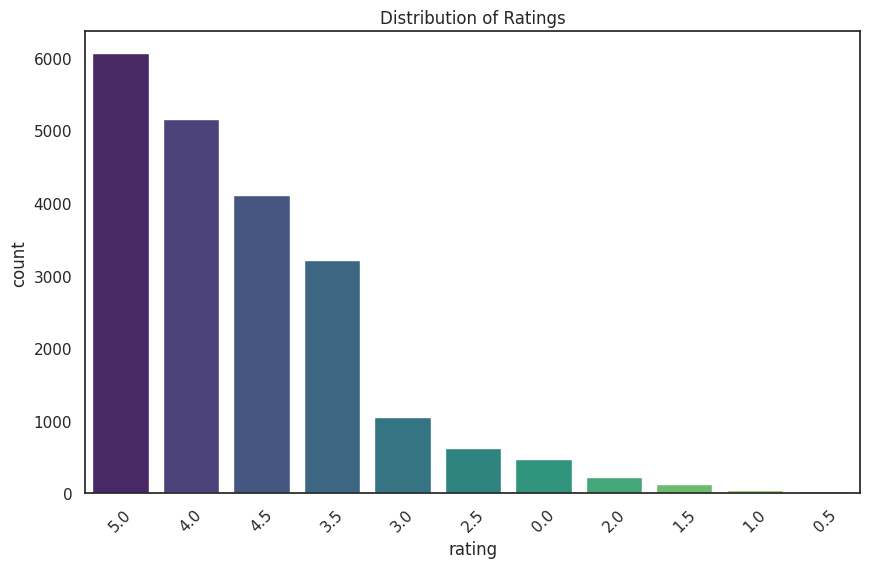

In [ ]:
sns.set(style='white')
plt.figure(figsize=(10,6))

sns.countplot(x='rating', data = df, order=df['rating'].value_counts().index,palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Ratings')
plt.show()

We can see that around 6000 audios have 5 star rating. Very few audios have less ratings.

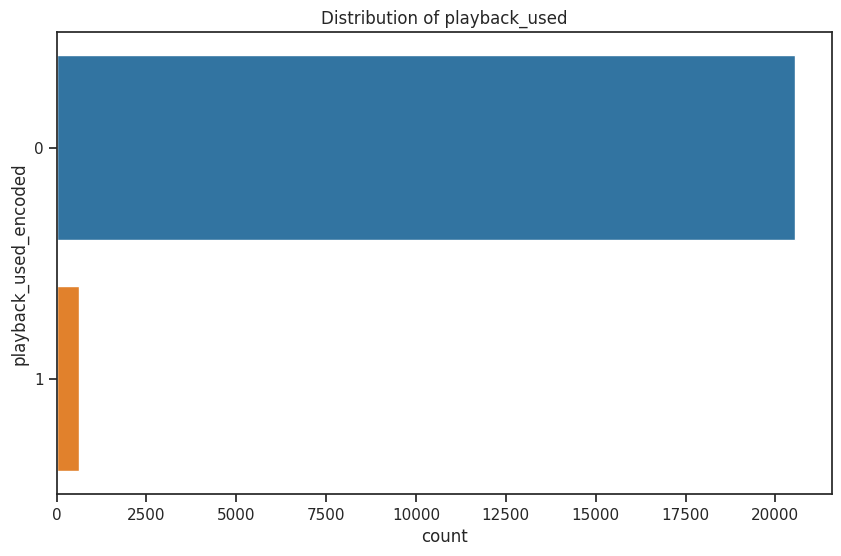

In [ ]:
sns.set(style='ticks')
plt.figure(figsize=(10,6))

sns.countplot(y='playback_used_encoded', data = df, palette='tab10')
plt.title('Distribution of playback_used')
plt.show()

The playback sound is not used in most of the audios.

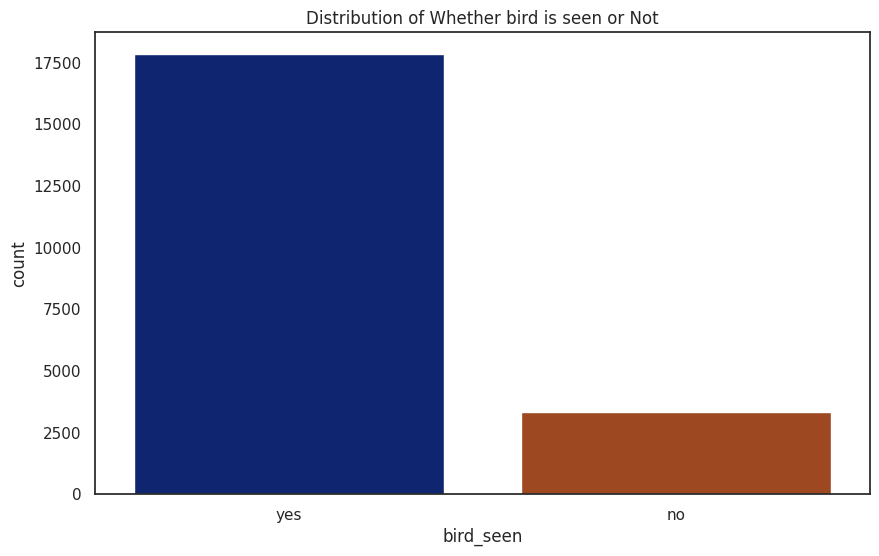

In [ ]:
sns.set(style='white')
plt.figure(figsize=(10,6))

sns.countplot(x='bird_seen', data = df, order=df['bird_seen'].value_counts().index,palette='dark')
plt.title('Distribution of Whether bird is seen or Not')
plt.show()

Its surprising to see that around 4000 birds are not seen till now though we have their audios.

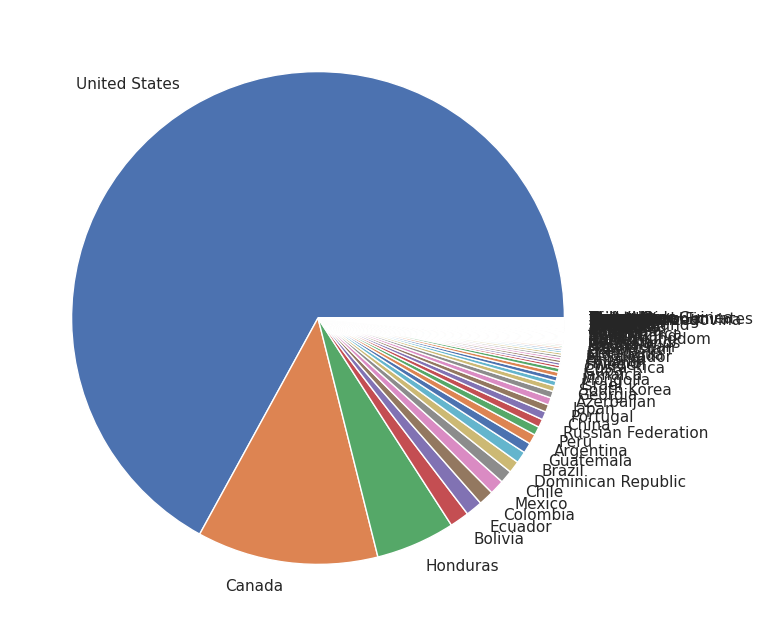

In [ ]:
sns.set(style='white')
plt.figure(figsize=(20,8))
total = df['country'].value_counts().sum()
label=df.country.unique()
values_count = df['country'].value_counts()
plt.pie(values_count,labels=label) # Create pie chart

plt.show() # Show chart


Around 60% audios are of birds from US.